In [1]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import category_encoders as ce

In [2]:
# Read data
data = pd.read_csv('dashboard_car_inventory.csv')

In [3]:
# Prepare the features and target variable
columns = ['color', 'number_of_seats', 'number_of_doors', 'type_of_gas', 'kilometers_per_liter', 'mileage']
X = data[columns].fillna(0)
y = data['rate'].fillna(0)

In [4]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Category encoding
encoder = ce.OrdinalEncoder(cols=columns)
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [6]:
# Convert the dataset into LightGBM format
lgb_train = lgb.Dataset(X_train, y_train)

In [7]:
# Set the parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse'
}

In [8]:
# Train the LightGBM model
model = lgb.train(params, lgb_train, num_boost_round=100)

[LightGBM] [Warning] There are no meaningful features, as all feature values are constant.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 28, number of used features: 0
[LightGBM] [Info] Start training from score 2658.392857
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Ligh

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1999.3193915272104


In [11]:
# Example usage to predict car prices for new data
# Set test parameters
color = 'Green'
number_of_seats = 7.0
number_of_doors = 4.0
type_of_gas = 'Diesel'
kilometers_per_liter = 16.0
mileage = 1300.05
new_data = encoder.fit_transform(
    pd.DataFrame(
        {
            'color': [color],
            'number_of_seats': [number_of_seats],
            'number_of_doors': [number_of_doors],
            'type_of_gas': [type_of_gas],
            'kilometers_per_liter': [kilometers_per_liter],
            'mileage': [mileage],
        }
    )
)

In [12]:
# Make prediction
prediction = model.predict(new_data)
print(f"Predicted price: {prediction[0]}")

Predicted price: 2658.3928571428573


In [13]:
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

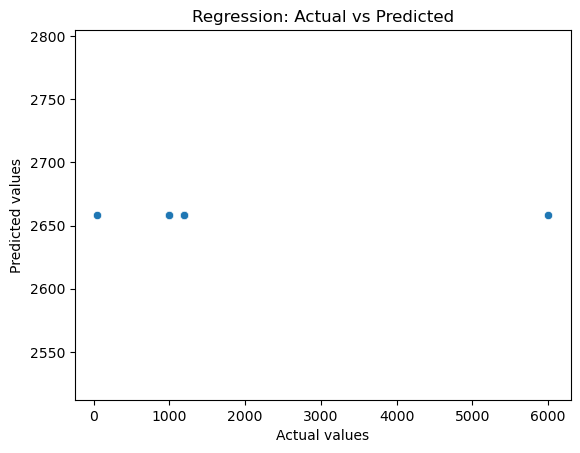

In [14]:
# Scatter plot of regression line
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Regression: Actual vs Predicted')
plt.show()

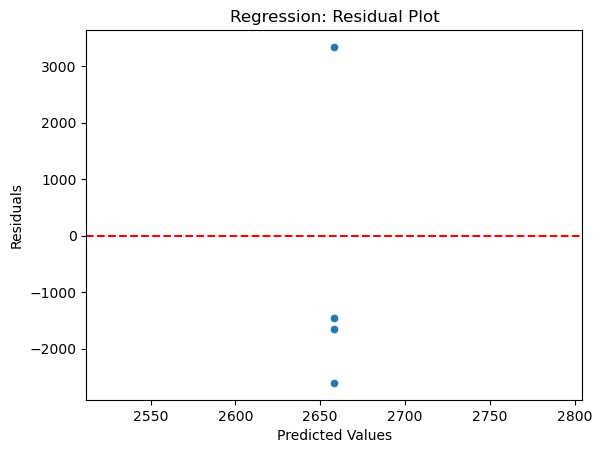

In [16]:
# Residual plot
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Regression: Residual Plot')
plt.show()

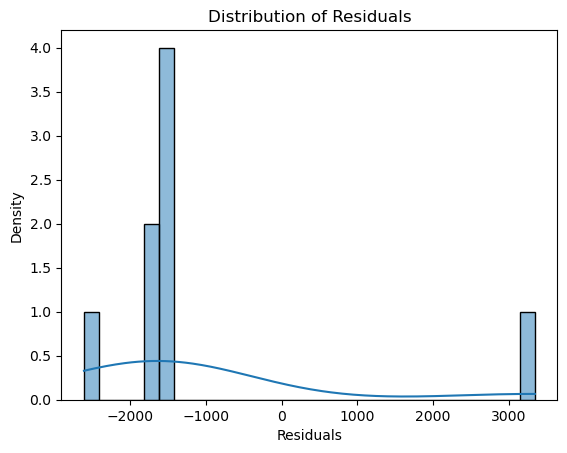

In [17]:
# Distribution of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()